In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1.satisfaction_level - Уровень удовлетворенности работой
2.Last_evaluation - Время с момента последней оценки в годах
3.number_projects - Количество проектов, выполненных за время работы
4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5.time_spend_company - Стаж работы в компании в годах
6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left - уволился ли сотрудник
8.promotion_last_5years - повышался ли сотрудник за последние пять лет
9.department - отдел в котором работает сотрудник
10.salary - относительный уровень зарплаты
1 Загрузите файл HR.csv в pandas dataframe

In [17]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3. Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные

In [24]:
df_corr = df.corr()
df_corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


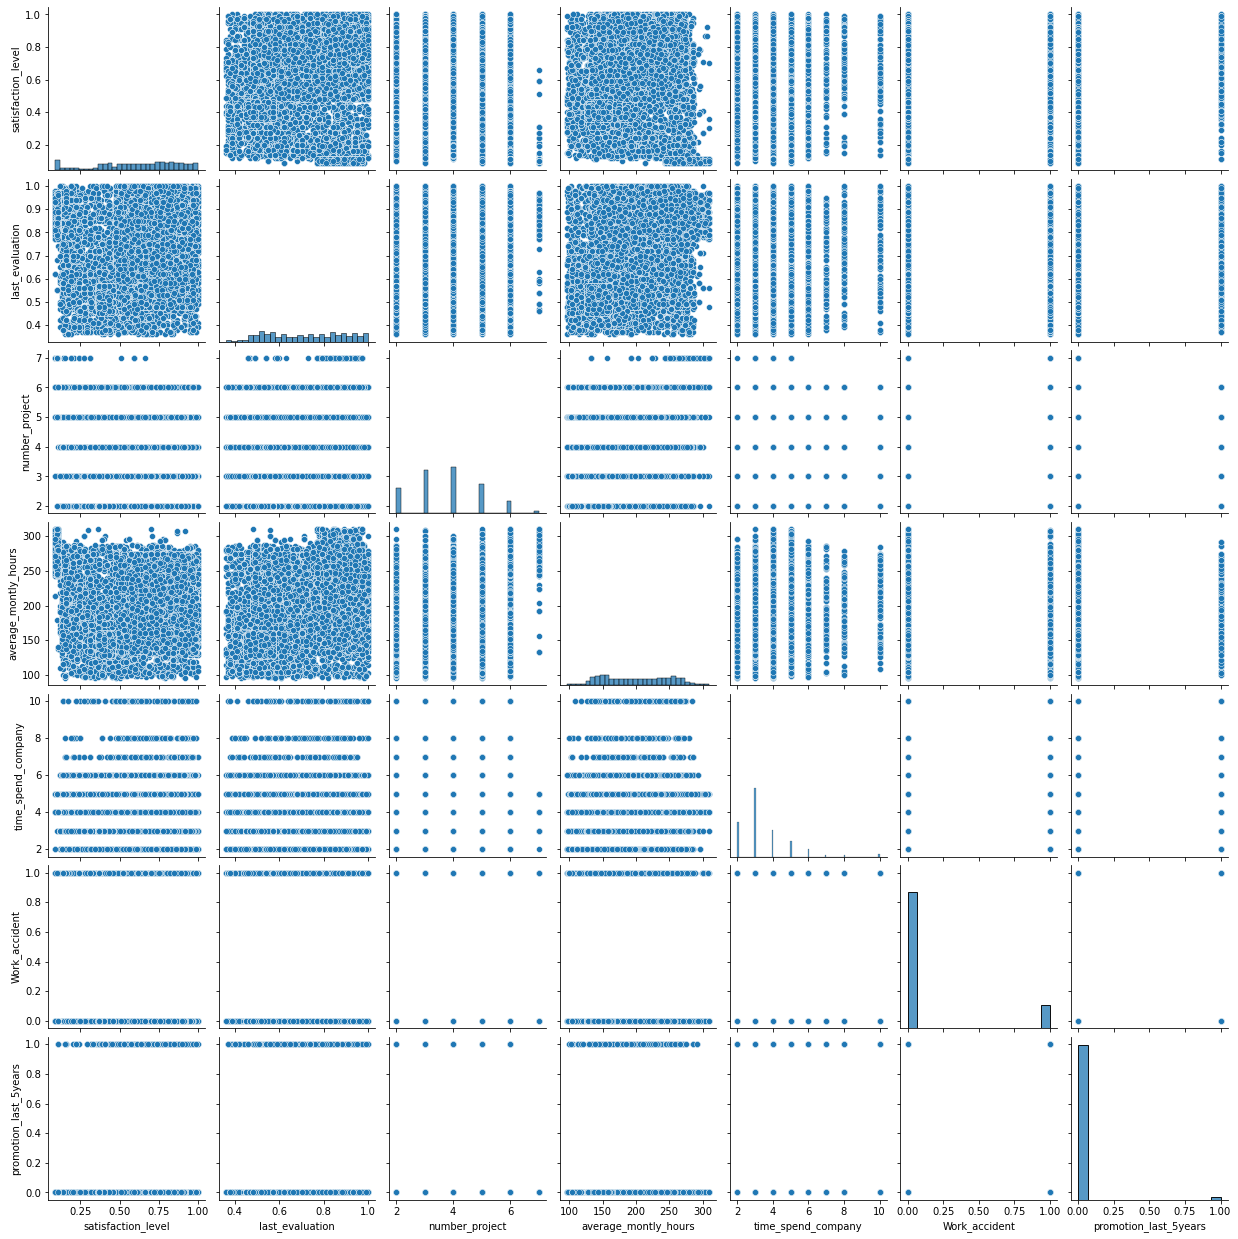

In [20]:
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']])

Две самые скоррелированные: average_monthly_hours и number_project - Среднее количество часов на рабочем месте в месяц и Количество проектов, выполненных за время работы.
Две наименее: Work_accident и time_spend_company - несчастные случаи на рабочем месте с сотрудником и Стаж работы в компании в годах.

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [34]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

5. Показать распределение сотрудников по зарплатам.

In [45]:
df['id'] = df.index + 1
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,id
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,3
3,0.72,0.87,5,223,5,0,1,0,sales,low,4
4,0.37,0.52,2,159,3,0,1,0,sales,low,5


<AxesSubplot:xlabel='id', ylabel='salary'>

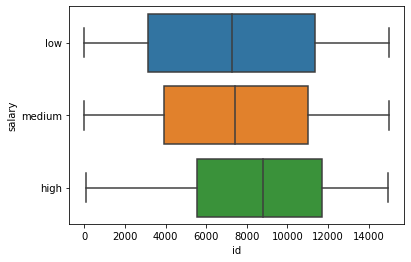

In [48]:
sns.boxplot(x='id', y='salary', 
            data=df)

6. Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

<AxesSubplot:title={'center':'Salary distribution per dep'}, xlabel='department', ylabel='salary'>

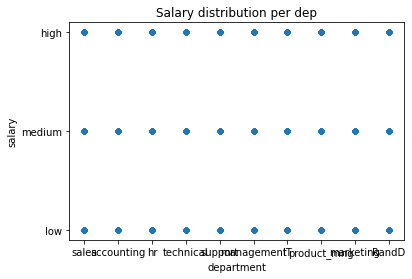

In [47]:
df.plot(kind='scatter', x='department', 
        y='salary', title='Salary distribution per dep')

7. Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом

In [4]:
df_s = df.replace({'low': 1, 'medium': 2, 'high': 3})
df_s

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,id
0,0.38,0.53,2,157,3,0,1,0,sales,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,2,2
2,0.11,0.88,7,272,4,0,1,0,sales,2,3
3,0.72,0.87,5,223,5,0,1,0,sales,1,4
4,0.37,0.52,2,159,3,0,1,0,sales,1,5
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1,14995
14995,0.37,0.48,2,160,3,0,1,0,support,1,14996
14996,0.37,0.53,2,143,3,0,1,0,support,1,14997
14997,0.11,0.96,6,280,4,0,1,0,support,1,14998


<AxesSubplot:xlabel='salary', ylabel='department'>

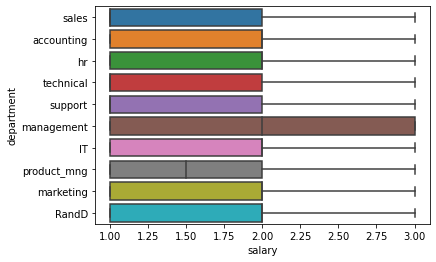

In [6]:
sns.boxplot(x='salary', y='department', 
            data=df_s)

8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
●Доля сотрудников с повышением за последние 5 лет●Средняя степень удовлетворенности●Среднее количество проектов

In [61]:
c = df.groupby(['left', 'promotion_last_5years']).agg({'id': 'count'})
c

id
left promotion_last_5years       
0    0                      11128
     1                        300
1    0                       3552
     1                         19

In [66]:
total = df.id.count()
total

14999

In [67]:
ids_part = c / total *100
ids_part

id
left promotion_last_5years           
0    0                      74.191613
     1                       2.000133
1    0                      23.681579
     1                       0.126675

In [29]:
df.groupby('left').satisfaction_level.mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [30]:
df.groupby('left').number_project.mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

9. Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки

In [84]:
data = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
data_class = df.left

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [108]:
lda = LinearDiscriminantAnalysis()

In [109]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [110]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [112]:
result

,left,Unnamed 0
50,1.0,1.0
12756,1.0,NaN
11349,0.0,NaN
2620,0.0,0.0
3078,0.0,0.0
...,...,...
10755,0.0,NaN
1801,1.0,0.0
12736,1.0,NaN
14651,1.0,NaN


In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(y_test, lda.predict(X_test))

0.7629333333333334

10. Загрузить jupyter notebook с решение на github и прислать ссылку